In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import utils.dataset_processing_utils as dputil

SEED = 42
np.random.seed(42)

In [4]:
demographics_df = dputil.load_dataset("wbg_pop_health_gdp.csv", encoding='latin-1')

---

### *wbg_pop_health_gdp* dataset

This dataset contains demographic data that will act as input features for the models and as normalization factors - $VPC_{year}=Z_{year}/p_{year}$ where:
- $VPC_{year}$: value per capita for a country in some year.
- $Z_{year}$: any numerical variable, for example *seizure_volume*.
- $p_{year}$: The country's population given in the given year.

#### overview features

Let us look again at the raw data we have exported:


In [5]:
demographics_df.sample(10, random_state=SEED)

,Afghanistan,AFG,"Population, total",SP.POP.TOTL,35688935,36743039,37856121,39068979,40000412,40578842,41454761,..,Unnamed: 12,Unnamed: 13
697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,Jordan,JOR,"Population, total",SP.POP.TOTL,10234226,10462306,10671891,10865228,11066356,11256263,11439213,..,NaN,NaN
227,Greece,GRC,"Population, total",SP.POP.TOTL,10754679,10732882,10721582,10698599,10569207,10436882,10405588,..,NaN,NaN
336,Liberia,LBR,GDP (current US$),NY.GDP.MKTP.CD,3390703400,3422754800,3319596500,3176126300,3513049500,4001047000,4240000000,..,NaN,NaN
537,Spain,ESP,GDP (current US$),NY.GDP.MKTP.CD,1.32175E+12,1.43164E+12,1.4035E+12,1.28978E+12,1.46124E+12,1.4465E+12,1.62009E+12,..,NaN,NaN
792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,Fiji,FJI,GDP (current US$),NY.GDP.MKTP.CD,5353469171,5581425325,5444407214,4432466237,4305031631,4969503561,5442046565,..,NaN,NaN
247,Guinea-Bissau,GNB,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,7.00049543,7.28224373,7.17018223,9.0293932,8.16332626,8.11358356,..,..,NaN,NaN
448,Pakistan,PAK,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,2.7863009,2.82844949,2.84736943,2.95273018,2.99015832,2.90434051,..,..,NaN,NaN
572,Tanzania,TZA,"Population, total",SP.POP.TOTL,55652890,57437145,59174891,60972798,62830412,64711821,66617606,..,NaN,NaN


We can see that currently the features we intended to use: Population, GDP and health expenditure are under the *Series Name* feature and the value per year for each year is a variable of its own.<br>
We'd like to pivot the dataframe so that each value in *Series Name* become a column and the years will become rows, which means each country that is currently represented with one row will be represented independently for each year - i.e. each country will be represented by 8 rows instead.<BR>
Firstly, we will need to handle `..` values, that probably act as null values - so we will turn them into `None` values.<BR><BR>
#### handle null values

In [18]:
demographics_df_edited = demographics_df.replace("..", np.nan)

# drop rows that only contain null values
demographics_df_edited = demographics_df_edited.dropna(how='all', axis=0)

print("demographics_df dimensions:", demographics_df_edited.shape)
demographics_df_edited.sample(10)

demographics_df dimensions: (640, 14)


C:\Users\User\AppData\Local\Temp\ipykernel_17904\1724646822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  demographics_df_edited = demographics_df.replace("..", np.nan)


,Country Name,Country Code,Series Name,Series Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024],Unnamed: 12,Unnamed: 13
123,China,CHN,"Population, total",SP.POP.TOTL,1396215000,1402760000,1407745000,1411100000,1412360000,1412175000,1410710000,NaN,NaN,NaN
207,French Polynesia,PYF,"Population, total",SP.POP.TOTL,280087,279815,279034,279209,279792,280378,281118,NaN,NaN,NaN
462,Peru,PER,"Population, total",SP.POP.TOTL,31324637,31897584,32449303,32838579,33155882,33475438,33845617,NaN,NaN,NaN
351,"Macao SAR, China",MAC,"Population, total",SP.POP.TOTL,648400,658900,672000,685400,682500,677300,678800,NaN,NaN,NaN
159,Denmark,DNK,"Population, total",SP.POP.TOTL,5764980,5793636,5814422,5831404,5856733,5903037,5946952,NaN,NaN,NaN
541,Sri Lanka,LKA,GDP (current US$),NY.GDP.MKTP.CD,94376237797,94493871201,89014978344,84304298771,88609324902,74144870023,84356863744,NaN,NaN,NaN
501,Senegal,SEN,"Population, total",SP.POP.TOTL,15475002,15914498,16352922,16789219,17220867,17651103,18077573,NaN,NaN,NaN
527,Solomon Islands,SLB,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,4.16556406,3.86440825,4.43728065,4.89478445,4.94758463,4.82369328,NaN,NaN,NaN,NaN
70,Bolivia,BOL,GDP (current US$),NY.GDP.MKTP.CD,37508642165,40287647930,40895322844,36629843805,40406111695,44008282878,45135398009,NaN,NaN,NaN
554,St. Vincent and the Grenadines,VCT,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,4.22985649,4.25346231,4.25543451,4.8395834,5.36252117,4.68767738,NaN,NaN,NaN,NaN


In [19]:
print(f"{'~'*10} {demographics_df_edited.columns[-1]} {'~'*10}", demographics_df_edited[demographics_df_edited.columns[-1]].value_counts(dropna=False))
print(f"{'~'*10} {demographics_df_edited.columns[-2]} {'~'*10}", demographics_df_edited[demographics_df_edited.columns[-2]].value_counts(dropna=False))


~~~~~~~~~~ Unnamed: 13 ~~~~~~~~~~ Unnamed: 13
NaN                                                        636
https://datacatalog.worldbank.org/public-licenses#cc-by      3
License URL                                                  1
Name: count, dtype: int64
~~~~~~~~~~ Unnamed: 12 ~~~~~~~~~~ Unnamed: 12
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       638
Notes from original source                                                                                                             

Now we will also remove columns that are unnecessary for our analysis:
- Series code: an alias for the variables found at *Series Name*
- The last two columns contain notes about the dataset, as you can see above. They don't contain any additional information.

We'll also remove the [YRXXXX] suffix from the year's columns are groundwork for the pivot table and dataset merging stages.<BR>
In addition, we will also change the values of our variables of interest to more programmatically-friendly format.

In [20]:
demographics_df_edited = demographics_df_edited.rename(columns={
    "2017 [YR2017]": "2017",
    "2018 [YR2018]": "2018",
    "2019 [YR2019]": "2019",
    "2020 [YR2020]": "2020",
    "2021 [YR2021]": "2021",
    "2022 [YR2022]": "2022",
    "2023 [YR2023]": "2023",
    "2024 [YR2024]": "2024",
    "Country Name": "country",

})
dem_df_cols = demographics_df_edited.columns.tolist()
dem_df_cols.remove('Series Code')
dem_df_cols = dem_df_cols[:-2]
demographics_df_edited = demographics_df_edited[dem_df_cols]

demographics_df_edited["Series Name"] = demographics_df_edited["Series Name"].replace({
    "GDP (current US$)": "gdp",
    "Population, total": "population",
    "Current health expenditure (% of GDP)": "health_expenditure"
})

demographics_df_edited.sample(10)

,country,Country Code,Series Name,2017,2018,2019,2020,2021,2022,2023,2024
622,Uruguay,URY,gdp,65006039995,65344576348,62222325807,53668636568,60760798596,70164683290,77240830877,NaN
534,South Sudan,SSD,population,10259154,10122977,10423384,10698467,10865780,11021177,11483374,NaN
188,Estonia,EST,health_expenditure,6.59727049,6.6912818,6.81699181,7.57906437,7.47860336,6.98701143,NaN,NaN
307,Kiribati,KIR,gdp,222875724.7,233514703.7,216985362.3,223123620.6,289339292.2,270841698.4,279208903.3,NaN
360,Malaysia,MYS,population,32355644,32910967,33440596,33889558,34282399,34695493,35126298,NaN
531,South Africa,ZAF,population,57635162,58613001,59587885,60562381,61502603,62378410,63212384,NaN
251,Guyana,GUY,health_expenditure,4.3191123,4.90492535,4.90331507,5.4180727,4.92369986,3.00636959,NaN,NaN
240,Guatemala,GTM,population,16567357,16845685,17103803,17357325,17598650,17847877,18124838,NaN
199,Fiji,FJI,gdp,5353469171,5581425325,5444407214,4432466237,4305031631,4969503561,5442046565,NaN
478,Qatar,QAT,gdp,1.61099E+11,1.83335E+11,1.76371E+11,1.44411E+11,1.79732E+11,2.35709E+11,2.13003E+11,NaN


#### pivot table and introduce *year* feature

We'd like to pivot the dataframe so'd the column for each year will become a single variable called *year*, that'll indicate the recording year the data. We'd also want to create for each value of *Series Name* its own variable.

(disclaimer - Gemini helped us tackle the errors we got when we tried to pivot the table)

In [21]:
melted_demographics_df = demographics_df_edited.melt(id_vars=['country', 'Country Code', 'Series Name'],
                                                     var_name='year',
                                                     value_name='value')

melted_demographics_df['year'] = melted_demographics_df['year'].astype(int)
melted_demographics_df['value'] = pd.to_numeric(melted_demographics_df['value'], errors='coerce')

pivoted_demographics_df = melted_demographics_df.pivot_table(index=['country', 'Country Code', 'year'],
                                                             columns='Series Name',
                                                             values='value')

pivoted_demographics_df = pivoted_demographics_df.reset_index()

pivoted_demographics_df.sample(10)

Series Name,country,Country Code,year,gdp,health_expenditure,population
391,Dominica,DMA,2023,6.539926e+08,NaN,66510.0
1066,Papua New Guinea,PNG,2019,2.475063e+10,2.325339,9609010.0
488,French Polynesia,PYF,2022,5.814661e+09,NaN,280378.0
917,Mongolia,MNG,2017,1.148085e+10,4.339542,3148917.0
1154,San Marino,SMR,2023,NaN,NaN,33860.0
976,Netherlands,NLD,2020,9.325610e+11,11.223557,17441500.0
1324,Syrian Arab Republic,SYR,2018,2.149778e+10,3.866130,19577845.0
694,Jordan,JOR,2018,4.337086e+10,6.982950,10462306.0
851,Maldives,MDV,2021,5.252457e+09,10.096117,516154.0
32,Andorra,AND,2021,3.324648e+09,8.334507,78364.0


Let's also add a GDP per capita column - to normalize the logarithmic scale of GDP:

In [22]:
pivoted_demographics_df['gdp_per_capita'] = pivoted_demographics_df['gdp'] / pivoted_demographics_df['population']

#### EDA for each variable:
Firstly let's examine the relationship between *GDP* and *health expenditure*, on average over the years, and see if richer countries put more effort into healthcare for their civilians:

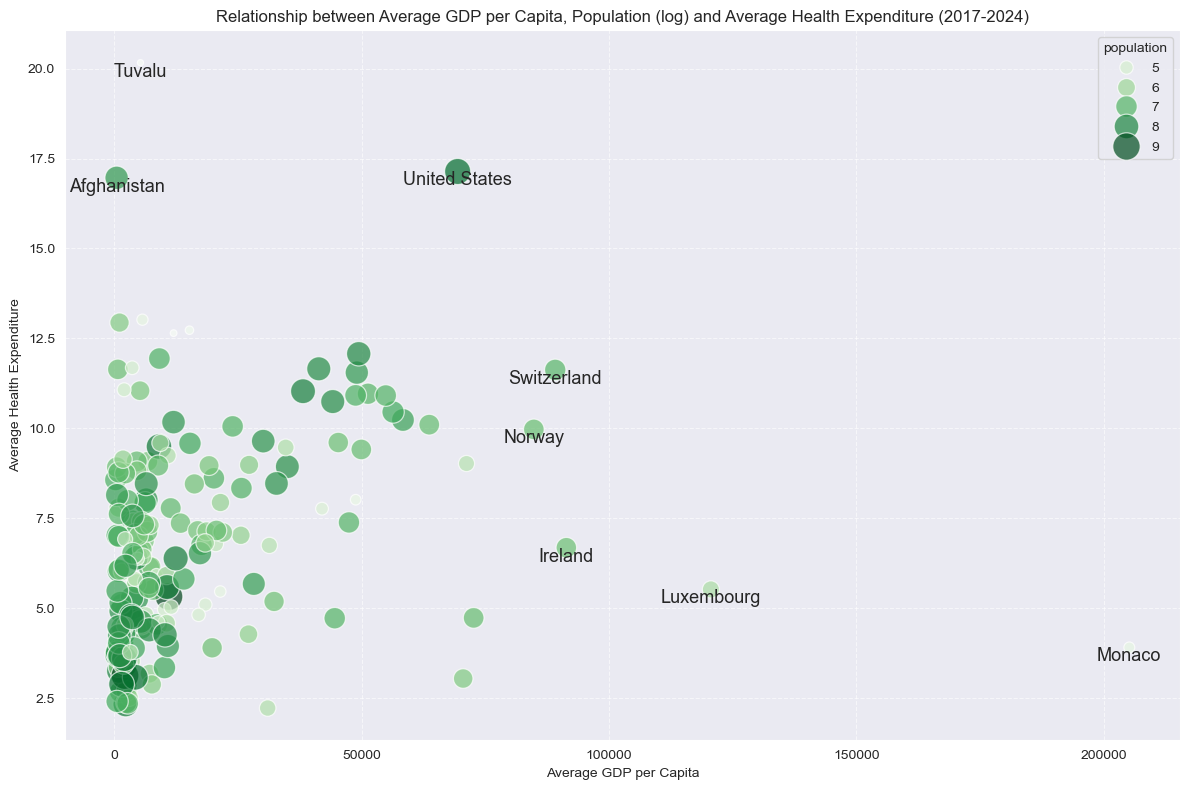

In [23]:
# Group by country and country code and calculate the mean of gdp_per_capita, health_expenditure, and population
df_averaged = pivoted_demographics_df.groupby(['country', 'Country Code'])[['gdp_per_capita', 'health_expenditure', 'population']].mean().reset_index()

# Apply log transformation to population, handling potential zero or negative values if any
df_averaged['population'] = np.log10(df_averaged['population'].replace(0, np.nan)) # Replace 0 with NaN to avoid log(0)

# Filter out rows with NaN values in 'gdp_per_capita' or 'health_expenditure' for plotting
df_plot_averaged = df_averaged.dropna(subset=['gdp_per_capita', 'health_expenditure'])


# Identify outlier points based on the specified criteria
outliers = df_plot_averaged[(df_plot_averaged['health_expenditure'] > 15) | (df_plot_averaged['gdp_per_capita'] > 75000)]

# Create the scatter plot for the averaged data, colored by average population
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_plot_averaged,
                x='gdp_per_capita',
                y='health_expenditure',
                hue='population', # Color by average population
                size='population', # Use size for population as well to add more visual weight
                sizes=(20, 400), # Adjust min/max size of markers
                palette='Greens', # Choose a suitable palette for population
                alpha=0.7)

plt.title('Relationship between Average GDP per Capita, Population (log) and Average Health Expenditure (2017-2024)')
plt.xlabel('Average GDP per Capita')
plt.ylabel('Average Health Expenditure')
plt.grid(True, linestyle='--', alpha=0.6)

# Label the outlier points
for i, row in outliers.iterrows():
    plt.text(row['gdp_per_capita'], row['health_expenditure'], row['country'],
             fontsize=13, ha='center', va='top')

plt.tight_layout()
plt.show()

It is unclear from the scatterplot above if the three variables have correlation between them, but there is some interesting insights:
- Most countries with a small GDP per capita have different healthcare budgets, so we can't say that low-income countries necessarily spend less on healthcare.
- Countries with high GDP per capita do not spend more on healthcare than "poorer" countries - see Ireland vs. Afghanistan for example.
- Population is not really a factor for health budget. However, there seems to be some relationship between it and GDP per capita (except some outlying values like the US) - The larger the country (in terms of population) the less each person is budgeted, and vice versa.

Let's try to infer some information using Spearman's correlation:<BR>
$\rho = 1 - \frac{6\sum_{i=1}^{n} d_i^2}{n(n^2-1)}$
<BR>
*We use Spearman since the data is not normally distributed, as we see above.


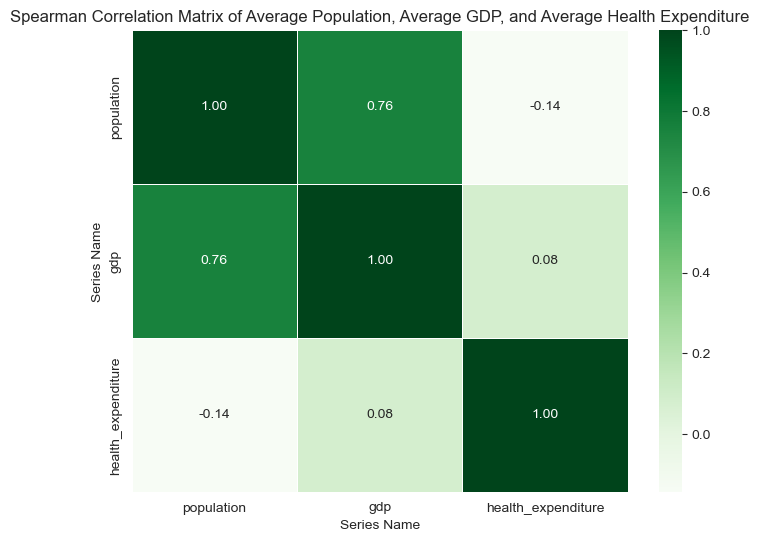

In [24]:
# Group by country and country code and calculate the mean of gdp, health_expenditure, and population
# This time we are using original gdp and population, not per capita or log scale
df_averaged_for_corr = pivoted_demographics_df.groupby(['country', 'Country Code'])[['gdp', 'health_expenditure', 'population']].mean().reset_index()

# Drop rows with NaN values in any of the three relevant columns for correlation matrix
df_plot_correlation_matrix = df_averaged_for_corr.dropna(subset=['gdp', 'health_expenditure', 'population'])

# Calculate the correlation matrix
correlation_matrix = df_plot_correlation_matrix[['population', 'gdp', 'health_expenditure']].corr(method='spearman')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Matrix of Average Population, Average GDP, and Average Health Expenditure')
plt.show()

As we can see from the correlation matrix above, there's a high correlation between *population* and *GDP*, which suggest that we should use the population as a normalization feature but not include it as an input to our models, since at least on variable might reliably replace it.
